170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
x_train shape:(50000, 32, 32, 3)
y_train shape:(50000, 1)
x_test shape:(10000, 32, 32, 3)
y_test shape:(10000, 1)


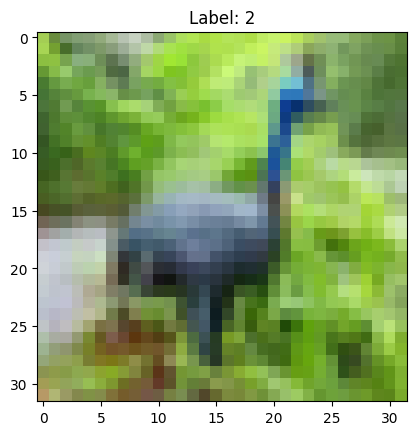

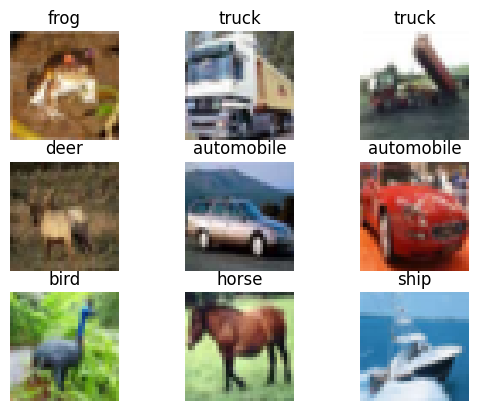

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 45ms/step - accuracy: 0.3512 - loss: 1.7582 - val_accuracy: 0.5581 - val_loss: 1.2581
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 39ms/step - accuracy: 0.5704 - loss: 1.2022 - val_accuracy: 0.6286 - val_loss: 1.0455
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 38ms/step - accuracy: 0.6388 - loss: 1.0190 - val_accuracy: 0.6445 - val_loss: 1.0174
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.6719 - loss: 0.9259 - val_accuracy: 0.6727 - val_loss: 0.9326
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 39ms/step - accuracy: 0.7067 - loss: 0.8340 - val_accuracy: 0.6838 - val_loss: 0.9116
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 40ms/step - accuracy: 0.7274 - loss: 0.7738 - val_accuracy: 0.6986 - val_loss: 0.8780
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 41ms/step - accuracy: 0.7429 - loss: 0.7341 - val_accuracy: 0.7019 - val_loss: 0.8682
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 40ms/step - accuracy: 0.7603 -

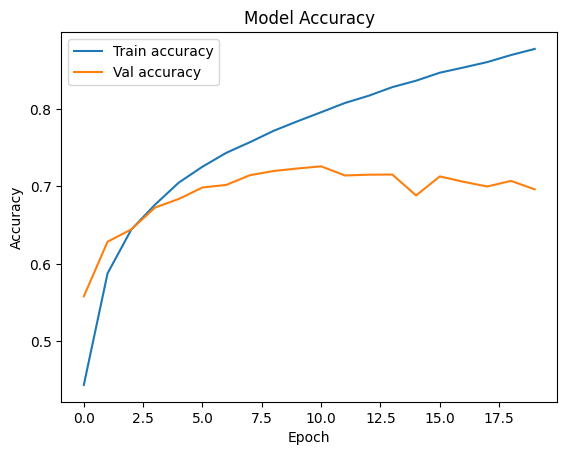

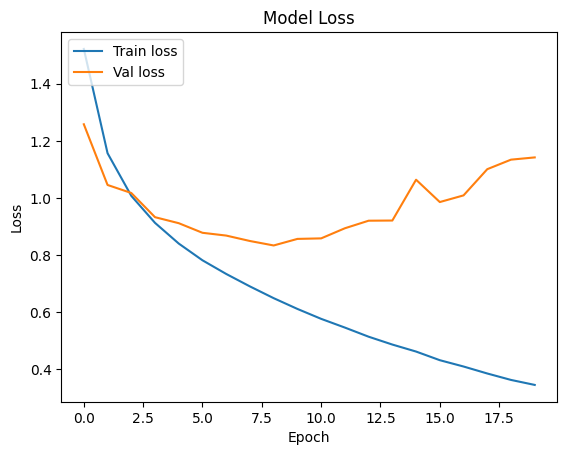

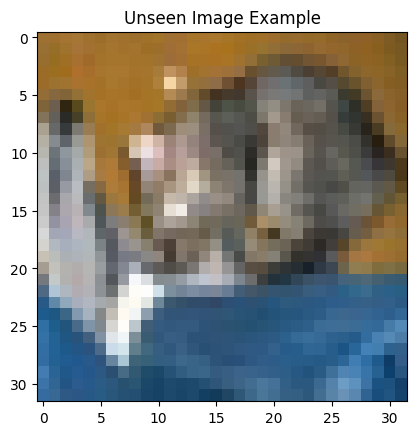

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Predicted Class: cat with confidence: 63.30%


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print(f"x_train shape:{x_train.shape}")
print(f"y_train shape:{y_train.shape}")
print(f"x_test shape:{x_test.shape}")
print(f"y_test shape:{y_test.shape}")
# Display sample image
plt.imshow(x_train[6])
plt.title(f'Label: {y_train[6][0]}')
def plot_images_by_class(images, labels, class_names, num_classes=10):
    # Create a dictionary to store one example per class
    class_examples = {}
    for i, label in enumerate(labels):
        label_idx = label[0]
        # Store the first occurrence of each class
        if label_idx not in class_examples:
            class_examples[label_idx] = images[i]
        # Stop if we have one example for each class
        if len(class_examples) == num_classes:
            break

    # Plot each class
    plt.figure(figsize=(10, 10))
    for i, (label_idx, img) in enumerate(class_examples.items()):
        plt.subplot(3, 4, i + 1)
        plt.imshow(img)
        plt.title(class_names[label_idx])
        plt.axis('off')
    plt.show()

plot_images_by_class(x_train, y_train, class_names)

# Define CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
# Compile and train model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

# Plot accuracy and loss
for metric in ['accuracy', 'loss']:
    plt.plot(history.history[metric], label=f'Train {metric}')
    plt.plot(history.history[f'val_{metric}'], label=f'Val {metric}')
    plt.title(f'Model {metric.capitalize()}')
    plt.xlabel('Epoch')
    plt.ylabel(metric.capitalize())
    plt.legend(loc='upper left')
    plt.show()


Test Accuracy: 69.62%
Test Loss: 1.1420
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


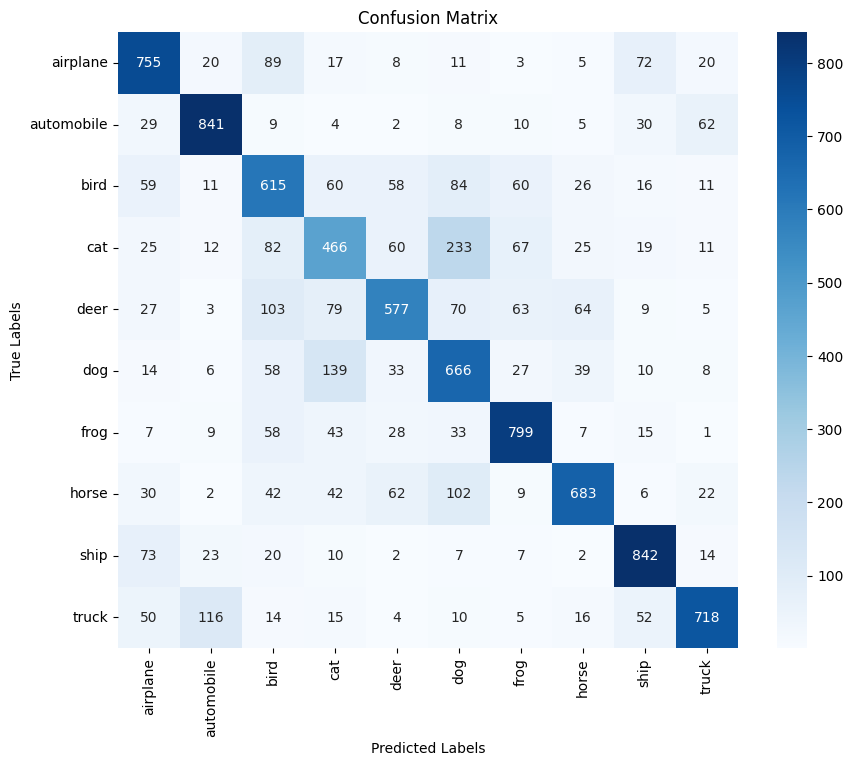

Classification Report:

              precision    recall  f1-score   support

    airplane       0.71      0.76      0.73      1000
  automobile       0.81      0.84      0.82      1000
        bird       0.56      0.61      0.59      1000
         cat       0.53      0.47      0.50      1000
        deer       0.69      0.58      0.63      1000
         dog       0.54      0.67      0.60      1000
        frog       0.76      0.80      0.78      1000
       horse       0.78      0.68      0.73      1000
        ship       0.79      0.84      0.81      1000
       truck       0.82      0.72      0.77      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

# Generate predictions and calculate confusion matrix
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test.flatten()  # Flatten y_test to match the shape of y_pred_classes

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=class_names))


In [1]:
!pip install tensorflow matplotlib numpy seaborn scikit-learn
